In [ ]:
#Assignment 1 - Research Skills: Image Analysis
#Ayrton Sambo - 2048852
#25/09/2020

In [174]:
import numpy as np
from skimage import io, color, exposure, img_as_float, img_as_uint, img_as_ubyte
from scipy.fftpack import fftn, ifftn, fftshift, ifftshift
from skimage.io import imshow_collection, imshow
from skimage.color import hsv2rgb
from PIL import Image
import matplotlib.pyplot as plt
import os
from skimage.exposure import histogram 
import cv2
from skimage.util import random_noise, img_as_float
import scipy.ndimage.filters
from scipy import signal
from datetime import datetime


In [2]:
os.chdir('C:\\Users\\aro13\\Downloads') # Working Directory.

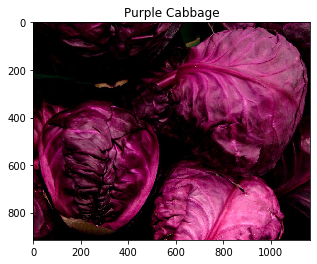

In [173]:
    # 1.1 Read in the color image` you have been provided. Display the image with an appropriate title.
im = io.imread('Assignment 1/2048852_rgbimage.jpg') # Read in from Downloads file on PC.
plt.title("Purple Cabbage")
plt.imshow(im)


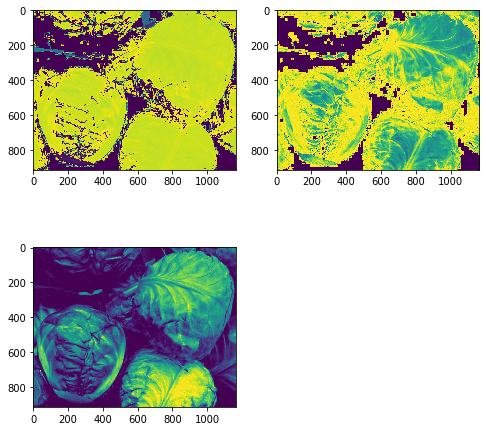

In [156]:
# 1.2 Convert the image to HSV. Separate the Hue, Saturation and Value channels. Display the three channels separately in three subplots.
im_hsv = color.rgb2hsv(im)

im_hue = im_hsv[:, :, 0] #hue
im_sat = im_hsv[:, :, 1] #saturation
im_value = im_hsv[:, :, 2] #value

plt.figure(figsize=(8,8))
plt.subplot(2,2,1,)
plt.imshow(im_hue)
plt.subplot(2,2,2)
plt.imshow(im_sat)
plt.subplot(2,2,3)
plt.imshow(im_value)

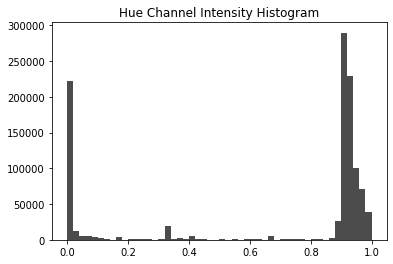

In [5]:
# 1.3 Display the intensity histogram of the hue channel
plt.title('Hue Channel Intensity Histogram') # Title
plt.hist(im_hue.ravel(), bins=50, facecolor='black', alpha=0.7) # intensity histogram with a 0.7 transparency value
plt.show()

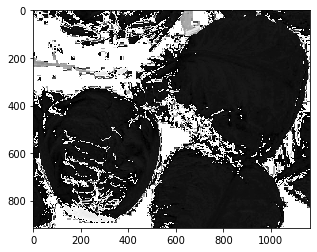

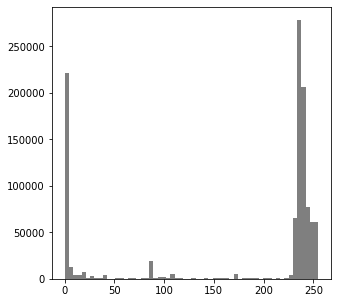

In [169]:
# 1.4 Perform contrast stretching on the hue channel. Display the contrast stretched hue channel (as a grayscale image) and its corresponding intensity histogram.

#The hue channel is a float type array
im_hue.dtype # check

# So, convert to arraythat ranges between 0->255 for contrast stretching.
im_uint = img_as_ubyte(im_hue)

p_left = np.percentile(im_uint, 2) 
p_right = np.percentile(im_uint, 98) 
im_stretched = exposure.rescale_intensity(im_uint, in_range=(p_left, p_right)) # Contrast stretching.

plt.imshow(im_stretched, cmap = 'gray_r') 
plt.figure(figsize=(5,5))
plt.hist(im_stretched.ravel(), bins = 60, facecolor = 'black', alpha = 0.5) # Intensity Histogram
plt.show()

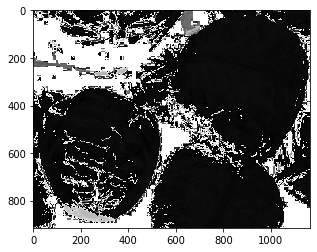

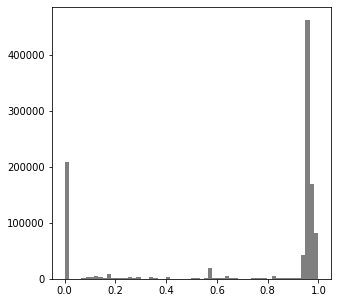

In [172]:
# 1.5 Perform gamma transformation on the hue channel with a gamma of 0.5 and gain of 1. Display the transformed hue channel (as a grayscale image) and its corresponding intensity histogram.

# We do not need to normalize because the im_hue.dtype() returns a float64 type array.
c = 1; #gain
gm = 0.5; #gamma 

im_huegamma = exposure.adjust_gamma(im_hue, gm,c); # Gamma transform function

plt.imshow(im_huegamma, cmap = 'gray_r') # Transformed Image

plt.figure(figsize=(5,5)) # Intensity histogram
plt.hist(im_huegamma.ravel(), bins = 60, facecolor = 'black', alpha = 0.5)
plt.show()

In [159]:
#1.6 Create two new HSV arrays with the two modified Hue channels (with the resulting channel from Question 4 and resulting channel from Question 5) with the original saturation and original value channels.

im_stretchfloat = img_as_float(im_stretched) #convert to float because it was type uint8 for contrast stretching
im_hsv1 = cv2.merge([im_stretchfloat, im_sat, im_value])
im_hsv2 = cv2.merge([im_huegamma, im_sat, im_value])

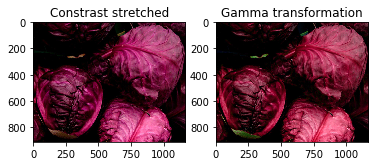

In [160]:
# 1.7 Convert two new HSV images to RGB. Convert the RGB arrays type to an unsigned integer with intensity values between 0 and 255. Display the converted RGB images in a subplot.

#from hsv to rgb
im_rgb1 = hsv2rgb(im_hsv1)
im_rgb2 = hsv2rgb(im_hsv2)

# Convert from type float to uint8
im1 = img_as_ubyte(im_rgb1)
im2 = img_as_ubyte(im_rgb2)

#Plots
plt.subplot(1,2,1)
plt.title("Constrast stretched")
plt.imshow(im1, 'gray')
plt.subplot(1,2,2)
plt.title("Gamma transformation")
plt.imshow(im2, cmap = 'gray')

In [ ]:
# 1.8 Why does intensity transformations in only one channel (the hue channel) change the RGB images? 

    # Because intensity transformation on the other channels would 1. affect the true colors (Hue) of the image and 2. the value channel only controls the brightness of the image. 

In [ ]:
######################################################################################################################################

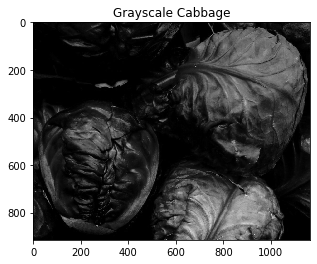

In [8]:
# 2.1 Convert the color image which you have been provided to grayscale. Display the image with a gray colormap and an appropriate title.

im_gray = color.rgb2gray(im)
plt.title("Grayscale Cabbage")
plt.imshow(im_gray, cmap = 'gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x18d164e1fc8>,
 Text(0.5, 1.0, 'Spectrum after log transformation'))

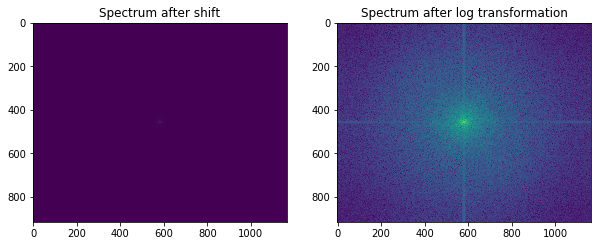

In [9]:
# 2.2 Convert the image to the frequency domain and display the FFT spectrum (FFT magnitude).

# First, convert to frequency domain by using Fourier Transform
imF = fftn(im_gray)

# Magnitude

S = abs(imF)

# shift spectrum to center due to lack of visibility
imF_shift = fftshift(imF)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1), plt.imshow(abs(imF_shift)), plt.title("Spectrum after shift")
plt.subplot(2,2,2), plt.imshow(np.log(1 + abs(imF_shift))), plt.title("Spectrum after log transformation")

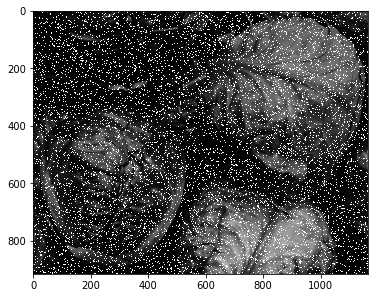

In [10]:
# 2.3 Add 10% salt and pepper noise to the image.
seed = 42 
im_noisy = random_noise(im_gray, seed=seed, mode='salt', amount=0.10)
plt.figure(figsize=(6,6)) 
plt.imshow(im_noisy, cmap = 'gray')

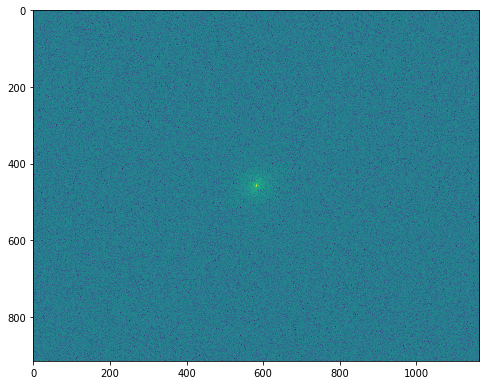

In [11]:
# 2.4 Convert the noisy image to the frequency domain and display the FFT spectrum (FFT magnitude).
imF_noisy = fftn(im_noisy)
imFc = fftshift(imF_noisy)

# log transformation. 
noisy_log = np.log(1 + abs(imFc));
plt.figure(figsize=(8,8)), 
plt.imshow(noisy_log);

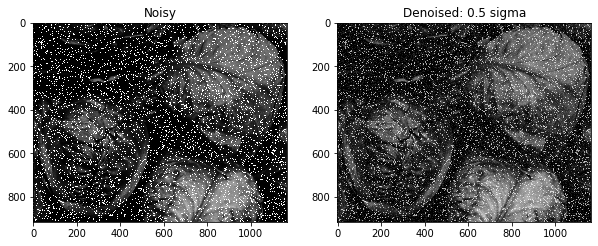

In [13]:
# 2.5 Denoise the noisy image by performing a Gaussian blur with `sigma=0.5` in the spatial domain. Display your denoised image.
im_denoise = scipy.ndimage.gaussian_filter(im_noisy, sigma = 0.5)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Noisy")
plt.imshow(im_noisy, cmap = 'gray')
plt.subplot(1,2,2)
plt.title("Denoised: 0.5 sigma")
plt.imshow(im_denoise, cmap = 'gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x18d1cd8f488>,
 Text(0.5, 1.0, 'Guassian Denoised Image'),
 <matplotlib.image.AxesImage at 0x18d1cda6fc8>)

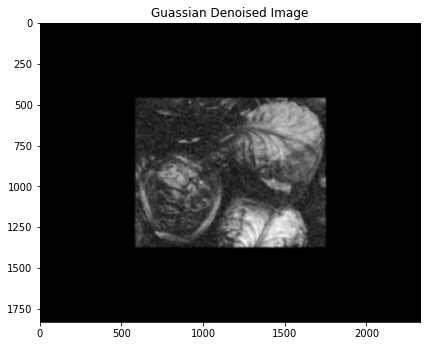

In [14]:
# 2.6 Convert the noisy image (the result of Question 3) to the frequency domain. Denoise the noisy image by performing a Gaussian blur with `sigma=1` in the frequency domain. Convert your denoised solution back to the spatial domain. Display your denoised image.

#Convert noisy image to the frequency domain
imF_noisy = fftn(im_noisy)

#Create a gaussian kernel
gauss_kernel = np.outer(signal.gaussian(imF_noisy.shape[0], 5), signal.gaussian(imF_noisy.shape[1], 5))

im_denoised = signal.fftconvolve(im_noisy, gauss_kernel, mode = 'full')

plt.figure(figsize=(15,12))
plt.subplot(1,2,2), plt.title("Guassian Denoised Image"), plt.imshow(im_denoised,cmap='gray')

In [126]:
# 2.7 Compare the time taken to run Gaussian blur operations in the spatial domain vs the frequency domain the following 7 values of sigma - 1,2,4,8,16,32 and 64. Plot the time taken vs sigma for both spatial and frequency domain in the same plot.

   ## Spatial Domain 
time_spatial = []
sigma = [1,2,4,8,16,32,64] 
for i in sigma:
   start_time = datetime.now()
   scipy.ndimage.gaussian_filter(im_noisy, sigma = i)
   end_time = datetime.now()
   duration = (end_time - start_time).microseconds
   time_spatial.append(duration)
print(time_spatial)

[72784, 74824, 60692, 87587, 172561, 425179, 980450]


In [131]:
 ## Frequency Domain
sigma = [1,2,4,8,16,32,64]
time_freq = []
for j in sigma: 
    start_time = datetime.now()
    gauss_kernel = np.outer(signal.gaussian(imF.shape[0], j), signal.gaussian(imF.shape[1], j))
    fftn(ifftshift(gauss_kernel))
    end_time = datetime.now()
    duration = (end_time - start_time).microseconds
    time_freq.append(duration)
print(time_freq)

[398799, 573263, 485571, 541329, 339597, 340959, 321663]


Text(0.5, 0, 'Time taken (in microseconds)')

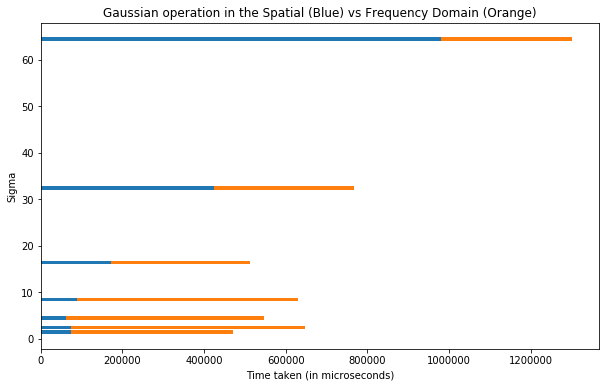

In [154]:
plt.subplots(figsize = (10,6))
plt.barh(sigma, time_spatial, align = 'edge')
plt.barh(sigma, time_freq, left = time_spatial, align= 'edge'),
plt.title("Gaussian operation in the Spatial (Blue) vs Frequency Domain (Orange)")
plt.ylabel("Sigma")
plt.xlabel("Time taken (in microseconds)")

In [ ]:
# 2.8 Briefly comment on your plot. When `sigma` is larger, the kernel is larger. Which domain is preferred for larger kernels?

# Normally larger kernels are not preferred due to loss of pixels but for a large image and therefore, a large kernel, the frequency domain is preferred. 

# It is clear from the plot that a larger sigma takes a longer time in the spatial domain than in the frequency domain. We can also see that operations in the spatial domain (for this image) are not as useful when sigma is larger because it takes a longer time. Smaller sigmas are useful in the spatial domain and larger sigmas are more useful in the frequency domain.
aussian blur operation is short; in this case, the larger the kernel, the longer it takes to run such an operation. 
# 
# Normally larger kernels are not preferred for normal sized images due to loss of pixels but for a large image, and a large kernel, the frequency domain is preferred it works faster.